<a href="https://colab.research.google.com/github/tuancompa2610/Earthquake-Damage-in-Nepal/blob/main/Nepal_Earthquake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Preparation




In [115]:
# Import Library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from category_encoders import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted
from category_encoders import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [116]:
# Load dataset from local
from google.colab import files
uploaded = files.upload()

Saving nepal_earthquake.csv to nepal_earthquake.csv


In [117]:
# Load data. Since our csv file has Unamed columns we should add parameter "index_col" in read_csv function
df = pd.read_csv("/content/nepal_earthquake.csv", index_col = 0)
df.head()

,b_id,building_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,superstructure,damage_grade
1,164002,164002,3,3,20,560,18,18,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Repaired and used,"Stone, mud mortar",Grade 2
2,164081,164081,2,2,21,200,12,12,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar",Grade 2
3,164089,164089,3,3,18,315,20,20,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar",Grade 2
4,164098,164098,2,2,45,290,13,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar",Grade 3
5,164103,164103,2,2,21,230,13,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar",Grade 3


In [118]:
# Get some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70836 entries, 1 to 70836
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   b_id                    70836 non-null  int64 
 1   building_id             70836 non-null  int64 
 2   count_floors_pre_eq     70836 non-null  int64 
 3   count_floors_post_eq    70836 non-null  int64 
 4   age_building            70836 non-null  int64 
 5   plinth_area_sq_ft       70836 non-null  int64 
 6   height_ft_pre_eq        70836 non-null  int64 
 7   height_ft_post_eq       70836 non-null  int64 
 8   land_surface_condition  70836 non-null  object
 9   foundation_type         70836 non-null  object
 10  roof_type               70836 non-null  object
 11  ground_floor_type       70836 non-null  object
 12  other_floor_type        70836 non-null  object
 13  position                70836 non-null  object
 14  plan_configuration      70836 non-null  object
 15  co

In [119]:
df["damage_grade"].value_counts().sort_values()

Grade 1     3570
Grade 2     7650
Grade 3    14097
Grade 4    20650
Grade 5    24869
Name: damage_grade, dtype: int64

Creates a new target column `"severe_damage"`. For buildings where the `"damage_grade"` is Grade 4 or above, `"severe_damage"` should be `1`. For all other buildings, `"severe_damage"` should be `0`.

In [120]:
df["damage_grade"] = df["damage_grade"].str[-1].astype(int)
df["severe_damage"] = (df["damage_grade"] > 3).astype(int)

In [121]:
# Set "building_id" as index and drop those unnecessary columns 
df.drop(columns = ["b_id", "damage_grade"], inplace = True)
df = df.set_index("building_id")
df.head()

,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,superstructure,severe_damage
building_id,,,,,,,,,,,,,,,,
164002,3,3,20,560,18,18,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Repaired and used,"Stone, mud mortar",0
164081,2,2,21,200,12,12,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar",0
164089,3,3,18,315,20,20,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar",0
164098,2,2,45,290,13,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar",0
164103,2,2,21,230,13,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar",0


# 2. EDA (Exploratory Data Analysis)

In [122]:
# Drop leaky features
# Those features with "post" are likely to be leaky featyres since those features happen after the earthquake.
df.drop(columns = ["count_floors_post_eq", "height_ft_post_eq", "condition_post_eq"], inplace = True)

Check correlation features

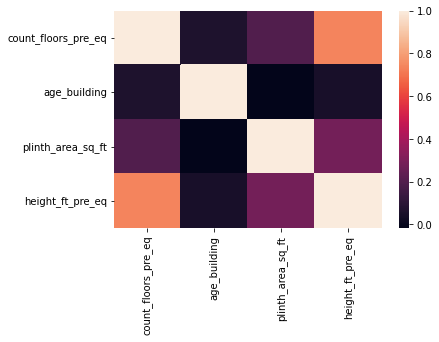

In [123]:
# Create correlation matrix
correlation = df.select_dtypes("number").drop(columns = "severe_damage").corr()
# Plot heatmap of `correlation`
sns.heatmap(correlation)

We saw that the correlation coefficient between `"count_floors_pre_eq"` and `"height_ft_pre_eq"` is nearly 1 so we only need one of those so I will decide to drop one of those but the question is `Which one`

In [124]:
corr_count_floors_pre_eq = df["severe_damage"].corr(df["count_floors_pre_eq"])
corr_height_ft_pre_eq = df["severe_damage"].corr(df["height_ft_pre_eq"])
print(f"The corelation coefficient between count_floors_pre_eq and severe_damage: {corr_count_floors_pre_eq}")
print(f"The corelation coefficient between height_ft_pre_eq and severe_damage: {corr_height_ft_pre_eq}")

The corelation coefficient between count_floors_pre_eq and severe_damage: 0.002892630372575261
The corelation coefficient between height_ft_pre_eq and severe_damage: -0.03847659083302044


It can be seen that the corelation coefficient between `"count_floors_pre_eq"` and `"severe_damage"` is smaller so I will drop this feature

In [125]:
df.drop(columns = "count_floors_pre_eq", inplace = True)

 Is there a relationship between the footprint size of a building and the damage it sustained in the earthquake

Text(0.5, 1.0, 'Plinth Area vs Building Damage')

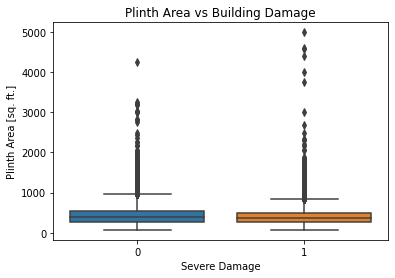

In [126]:
sns.boxplot(x = "severe_damage", y = "plinth_area_sq_ft", data = df)
plt.xlabel("Severe Damage")
plt.ylabel("Plinth Area [sq. ft.]")
plt.title("Plinth Area vs Building Damage")

In [127]:
majority_class_prop, minority_class_prop = df["severe_damage"].value_counts(
    normalize = True)
print(majority_class_prop, minority_class_prop)

0.6425969845841097 0.3574030154158902


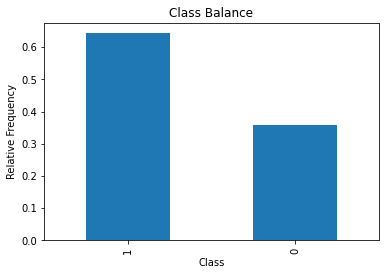

In [128]:
# Plot value counts of `"severe_damage"`
df["severe_damage"].value_counts(normalize = True).plot(
	kind = "bar", xlabel = "Class", ylabel = "Relative Frequency", title = "Class Balance"
)

Are buildings with certain foundation types more likely to suffer severe damage? 

In [129]:
# Create pivot table
foundation_pivot = pd.pivot_table(
	df, index = "foundation_type", values = "severe_damage", aggfunc = np.mean
).sort_values(by = "severe_damage")
foundation_pivot

,severe_damage
foundation_type,
RC,0.026224
Bamboo/Timber,0.324074
Cement-Stone/Brick,0.421908
Mud mortar-Stone/Brick,0.687792
Other,0.818898


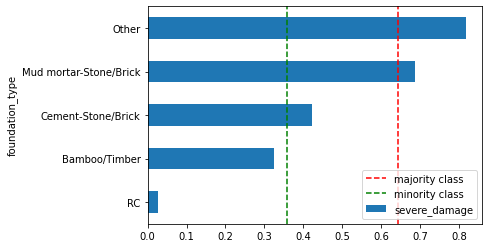

In [130]:
# Plot bar chart of `foundation_pivot`
foundation_pivot.plot(kind = "barh", legend = None)
plt.axvline(
	majority_class_prop, linestyle = "--", color = "red", label = "majority class"
)
plt.axvline(
	minority_class_prop, linestyle = "--", color = "green", label = "minority class"
)
plt.legend(loc = "lower right")

Checking High-Cardinality, Low-Cardinality features

In [131]:
# Check for high- and low-cardinality categorical features
df.select_dtypes("object").nunique()

land_surface_condition     3
foundation_type            5
roof_type                  3
ground_floor_type          5
other_floor_type           4
position                   4
plan_configuration        10
superstructure            11
dtype: int64

# 3. Split Data

In [132]:
# Split feature columns and label 
target = "severe_damage"
X = df.drop(columns = [target])
y = df[target]
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (70836, 11)
y shape: (70836,)


In [133]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

In [134]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size = 0.2, random_state = 42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (56668, 11)
y_train shape: (56668,)
X_test shape: (11334, 11)
y_test shape: (11334,)


# 4. Logistic Regression

### Baseline

In [135]:
acc_baseline = y.value_counts(normalize = True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.64


### Iterate

In [136]:
model_lr = make_pipeline(OneHotEncoder(use_cat_names = True), LogisticRegression(max_iter = 1000))
model_lr.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['land_surface_condition',
                                     'foundation_type', 'roof_type',
                                     'ground_floor_type', 'other_floor_type',
                                     'position', 'plan_configuration',
                                     'superstructure'],
                               use_cat_names=True)),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [137]:
lr_train_acc = accuracy_score(y_train, model_lr.predict(X_train))
lr_val_acc = accuracy_score(y_val, model_lr.predict(X_val))

print("Logistic Regression, Training Accuracy Score:", lr_train_acc)
print("Logistic Regression, Validation Accuracy Score:", lr_val_acc)

Logistic Regression, Training Accuracy Score: 0.7137185007411591
Logistic Regression, Validation Accuracy Score: 0.7224025974025974


# 5. Decision Tree

### Train model

In [138]:
# Build Model
model = make_pipeline(OrdinalEncoder(), DecisionTreeClassifier(random_state = 42))
# Fit model to training data
model.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['land_surface_condition',
                                      'foundation_type', 'roof_type',
                                      'ground_floor_type', 'other_floor_type',
                                      'position', 'plan_configuration',
                                      'superstructure'],
                                mapping=[{'col': 'land_surface_condition',
                                          'data_type': dtype('O'),
                                          'mapping': Steep slope       1
Flat              2
Moderate slope    3
NaN              -2
dtype: int64},
                                         {'col': 'foundation_type',
                                          'dat...
E-shape                             8
U-shape                             9
Building with Central Courtyard    10
NaN                                -2
dtype: int64},
                                         {'col':

In [139]:
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_val = accuracy_score(y_val, model.predict(X_val))

print("Decision Tree, Training Accuracy:", round(acc_train, 2))
print("Decision Tree, Validation Accuracy:", round(acc_val, 2))

Decision Tree, Training Accuracy: 0.98
Decision Tree, Validation Accuracy: 0.65


### Tunning Hyperparameters

In [140]:
tree_depth = model.named_steps["decisiontreeclassifier"].get_depth()
print("Tree Depth:", tree_depth)

Tree Depth: 61


In [141]:
depth_hyperparams = range(1, 70, 2)
training_acc = []
validation_acc = []

for d in depth_hyperparams:
    # Create model with `max_depth` of `d`
    test_model = make_pipeline(OrdinalEncoder(), DecisionTreeClassifier(max_depth = d, random_state = 42))
    # Fit model to training data
    test_model.fit(X_train, y_train)
    # Calculate training accuracy score and append to `training_acc`
    training_acc.append(accuracy_score(y_train, test_model.predict(X_train)))
    # Calculate validation accuracy score and append to `training_acc`
    validation_acc.append(accuracy_score(y_val, test_model.predict(X_val)))

print("Training Accuracy Scores:", training_acc[:3])
print("Validation Accuracy Scores:", validation_acc[:3])

Training Accuracy Scores: [0.6959659772711231, 0.7090421401849368, 0.714494953059928]
Validation Accuracy Scores: [0.703416149068323, 0.717391304347826, 0.7216261998870694]


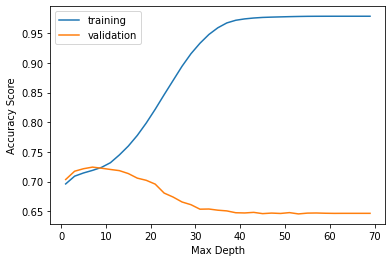

In [142]:
# Plot `depth_hyperparams`, `training_acc`
plt.plot(depth_hyperparams, training_acc, label = "training")
plt.plot(depth_hyperparams, validation_acc, label = "validation")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.legend()

Base on my visualization I conclude that the best validation score occur when `"max_depth"` = 7

In [143]:
retrain_model = make_pipeline(OrdinalEncoder(), DecisionTreeClassifier(max_depth = 7, random_state = 42))
retrain_model.fit(X_train, y_train)
test_acc = accuracy_score(y_test, retrain_model.predict(X_test))
print("Test Accuracy:", round(test_acc, 2))

Test Accuracy: 0.72


### 6. Communicate

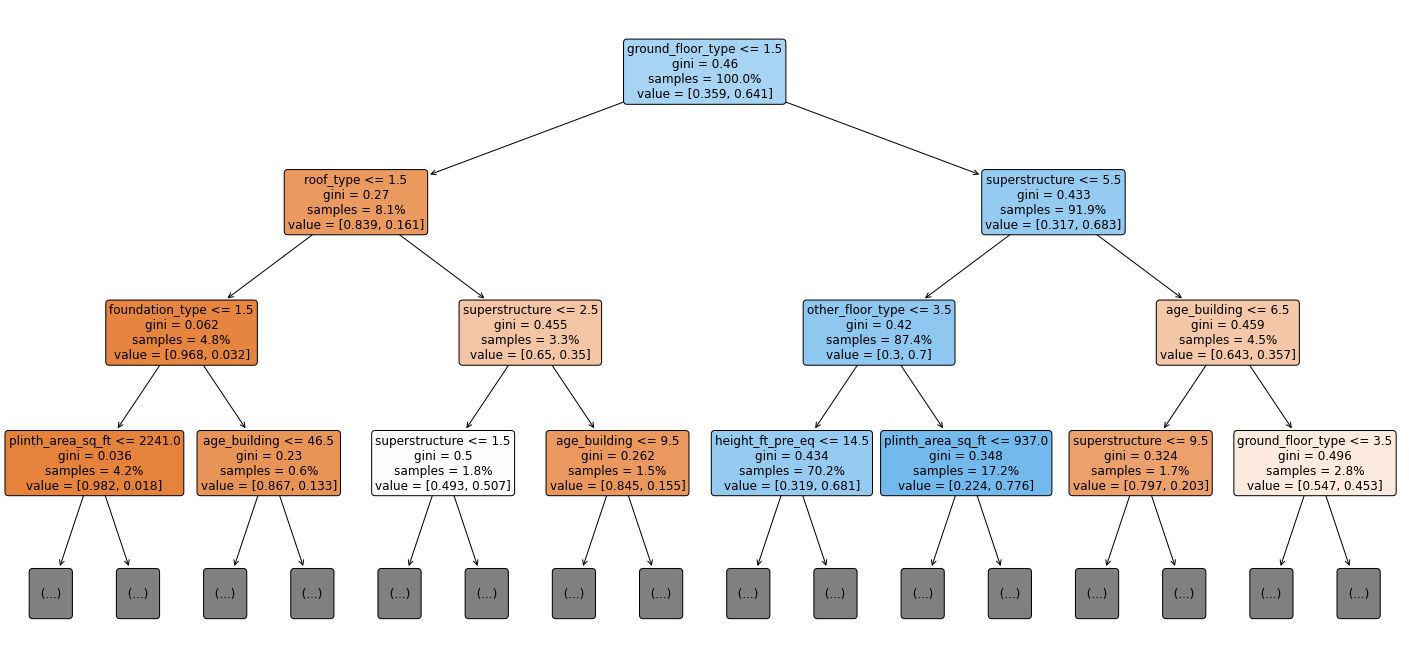

In [144]:
# Create larger figure
fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree=model.named_steps["decisiontreeclassifier"],
    feature_names=X_train.columns,
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=3,  # Only display first 3 levels
    fontsize=12,  # Enlarge font
    ax=ax,  # Place in figure axis
);

In [145]:
features = X_train.columns
importances = model.named_steps["decisiontreeclassifier"].feature_importances_

print("Features:", features[:3])
print("Importances:", importances[:3])

Features: Index(['age_building', 'plinth_area_sq_ft', 'height_ft_pre_eq'], dtype='object')
Importances: [0.25763328 0.3643121  0.07780235]


In [146]:
feat_imp = pd.Series(importances, index = features).sort_values()
feat_imp.head()

plan_configuration        0.014611
foundation_type           0.015119
other_floor_type          0.015247
land_surface_condition    0.024537
roof_type                 0.037765
dtype: float64

Text(0.5, 0, 'Gini Importance')

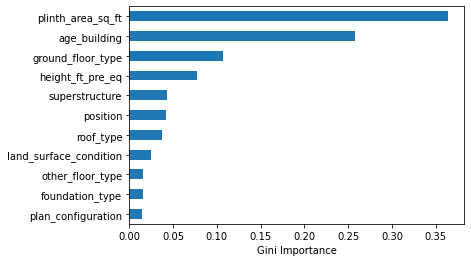

In [147]:
# Create horizontal bar chart
feat_imp.plot(kind = "barh")
plt.xlabel("Gini Importance")